In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Load the dataset
from google.colab import files
uploaded = files.upload()

cars_data = pd.read_csv('cars_clus.csv')
print(cars_data.head())

# Display the first few rows of the dataset to understand its structure
cars_data.head()


Saving cars_clus.csv to cars_clus (2).csv
  manufact    model   sales  resale type   price engine_s horsepow wheelbas  \
0    Acura  Integra  16.919   16.36    0    21.5      1.8      140    101.2   
1    Acura       TL  39.384  19.875    0    28.4      3.2      225    108.1   
2    Acura       CL  14.114  18.225    0  $null$      3.2      225    106.9   
3    Acura       RL   8.588  29.725    0      42      3.5      210    114.6   
4     Audi       A4  20.397  22.255    0   23.99      1.8      150    102.6   

  width length curb_wgt fuel_cap mpg lnsales  partition  
0  67.3  172.4    2.639     13.2  28   2.828          0  
1  70.3  192.9    3.517     17.2  25   3.673          0  
2  70.6    192     3.47     17.2  26   2.647          0  
3  71.4  196.6     3.85       18  22    2.15          0  
4  68.2    178    2.998     16.4  27   3.015          0  


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


In [7]:
# Clean the dataset by removing rows with null or invalid values
cars_data.replace('$null$', np.nan, inplace=True)
cars_data.dropna(inplace=True)

# Convert numeric columns to the appropriate data type
numeric_cols = ['sales', 'resale', 'price', 'engine_s', 'horsepow',
                'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']
cars_data[numeric_cols] = cars_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Normalize the data
scaler = MinMaxScaler()
cars_data_scaled = scaler.fit_transform(cars_data[numeric_cols])

# Display the scaled data shape and a sample
pd.DataFrame(cars_data_scaled, columns=numeric_cols).head()


,sales,resale,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,0.031102,0.179516,0.167178,0.114286,0.215190,0.186551,0.281437,0.306258,0.231056,0.133641,0.433333
1,0.072669,0.235855,0.261228,0.314286,0.430380,0.336226,0.461078,0.579228,0.503727,0.317972,0.333333
2,0.015687,0.393733,0.446603,0.357143,0.392405,0.477223,0.526946,0.628495,0.607143,0.354839,0.233333
3,0.037537,0.274002,0.201118,0.114286,0.240506,0.216920,0.335329,0.380826,0.342547,0.281106,0.400000
4,0.034545,0.294839,0.336877,0.257143,0.367089,0.349241,0.808383,0.567244,0.517391,0.377880,0.233333


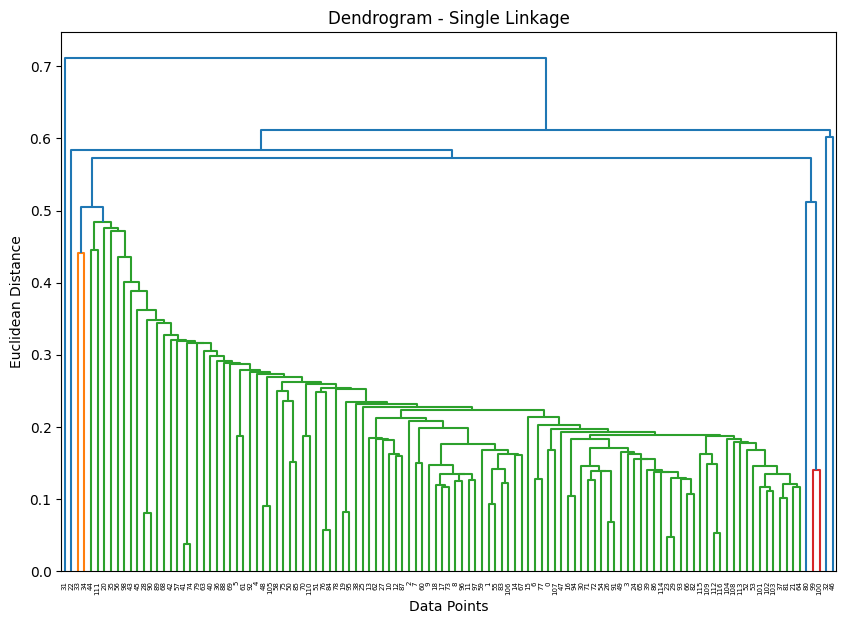

In [8]:
# Create a dendrogram using single linkage
plt.figure(figsize=(10, 7))
linked_single = linkage(cars_data_scaled, method='single')
dendrogram(linked_single)
plt.title("Dendrogram - Single Linkage")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


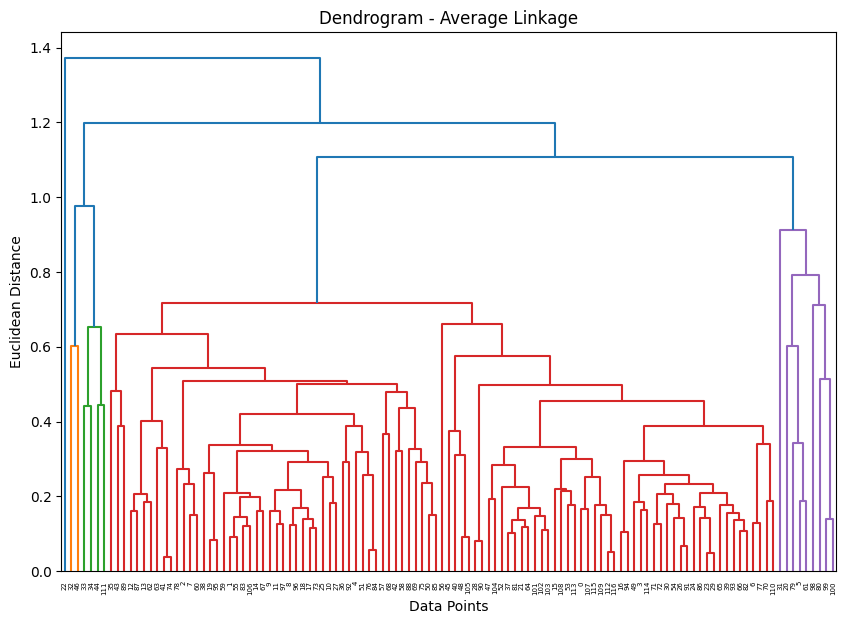

In [9]:
# Create a dendrogram using average linkage
plt.figure(figsize=(10, 7))
linked_average = linkage(cars_data_scaled, method='average')
dendrogram(linked_average)
plt.title("Dendrogram - Average Linkage")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()
